# Linear Regression, Logistic Regression and Clustering

There are 3 sections to this demonstration:

1. Linear Regression
* Logisitc Regression
* Clustering

A different dataset will be used in each of the sections to demonstrate the concepts.

## Linear Regression

In this section, I will be showing you how to implement the linear regression model from scratch. Implementing the linear regression model from scratch helps us to understand the fundamental ideas behind data science.

## About the dataset

The dataset for this demonstration is the **Combined Cycle Power Plant** dataset from [UCI Machine Learning Rpository](http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant).

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Data consist of hourly average ambient variables **Temperature (AT)**, **Ambient Pressure (AP)**, **Relative Humidity (RH)** and **Exhaust Vacuum (V)** to **predict the net hourly electrical energy output (PE)** of the plant.

**Business Question**: How to increase the electrical energy output of the power plant per dollar of operation cost?

In [98]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [99]:
# Loading some python libraries
from itertools import product, combinations
import math

# Library for plotting
import matplotlib.pyplot as plt

# Libraries for numerical calculations.
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from sklearn.linear_model import LinearRegression

# Only for jupyter notebooks. To specify showing graphs directly in the notebook.
% matplotlib inline

In [100]:
# Loading the dataset
filename = 'data\Folds5x2_pp.xlsx'
data = pd.read_excel(filename, sheetname=0)
num_data = data.shape[0]

# Showing the column names and size of the dataset.
print 'Variables in the dataset', data.columns.values
print 'Dimensions of the dataset', data.shape

Variables in the dataset [u'AT' u'V' u'AP' u'RH' u'PE']
Dimensions of the dataset (9568, 5)


In [101]:
# Spliting the dataset into training, validation and testing data in the proportion 60, 20, 20.
indices = range(num_data) # Generate a list of sequential numbers from 0 to the number of data.
np.random.shuffle(indices) # Randomly shuffle the indices in-place

proportions = [0.6, 0.8]
train_data = data.loc[indices[:int(num_data*proportions[0])]]
val_data = data.loc[indices[int(num_data*proportions[0]):int(num_data*proportions[1])]]
test_data = data.loc[indices[int(num_data*proportions[1]):]]

Let's take a look at the relationship between each variable and the outcome in the training data.

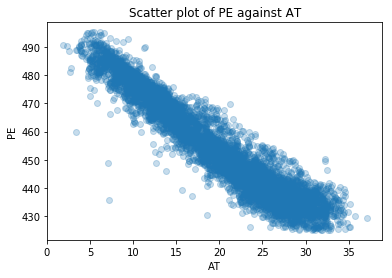

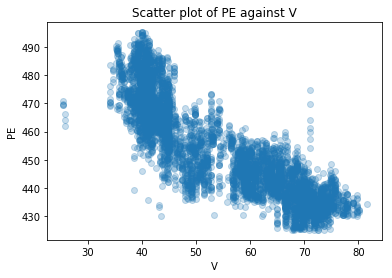

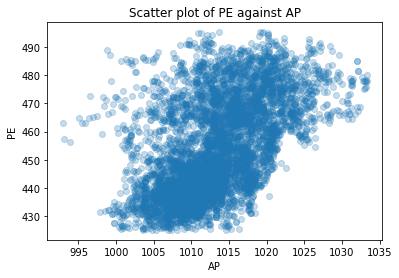

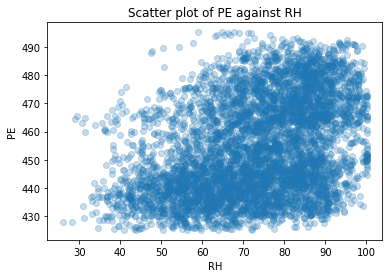

In [102]:
features = [colname for colname in data.columns.values if colname != 'PE']
outcome = 'PE'

for feature in features:
    plt.scatter(train_data[feature], train_data[outcome], alpha = 0.25)
    plt.title('Scatter plot of PE against {0}'.format(feature))
    plt.ylabel(outcome)
    plt.xlabel(feature)
    plt.show()

Linear regression can be broken down into these steps.

**Step 1** Start with hypothesis<br><br> $h(x^{(i)}) = \theta_0 x_0^{(i)} + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + ... + \theta_n x_n^{(i)}$$$$$

where $\theta_0x_0^{(i)}$ is the bias or y-intercept

$\theta_0$ is the parameter for the bias term

$x_0^{(i)} = 1$.

<img src='.\img\hypothesis.png' align='left'/>

**Step 2** Give $\theta_j$ an initial value, for example, $\theta_0 = 0$, $\theta_1 = 0$, $\theta_2 = 0$ etc...$$$$
**Step 3** Calculate the cost of the prediction, 

$$J = \frac{1}{2m} \sum_{i=0}^m (h(x^{(i)}) - y^{(i)})^2$$

$$where\; h(x^{(i)}) - y^{(i)} = \;error\; of\;prediction\;for\;the\;i^{th}\;data\;point$$

$\frac{1}{m} \sum_{i=0}^m (h(x^{(i)}) - y^{(i)})^2$ is the mean square error (MSE).

$\frac{1}{2}$ is a mathematical convenience which you will see in the next step.

<img src='img\cost function.png' align='left' height='400' width='400'/>

The plot of cost against the parameter $\theta_1$

<img src='img\descente-gradient-3d.jpg' align='left'/>

The surface plot of the cost against 2 of the parameters

**Step 4** Calculate the gradient of each parameter, $\theta_j$ by partial differentiation:

$$\frac{\partial J}{\partial\theta_j} = \frac{1}{m} \sum_{i=0}^{m}(h(x^{(i)})-y^{(i)})(x_j^{(i)})\qquad \forall j$$

Recall $$h(x^{(i)}) = \theta_0 x_0^{(i)} + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + ... + \theta_n x_n^{(i)}$$

Where $j$ is the index of the variable e.g. $x^{(3)}_2$ is the 3 row of data for the variable with index 2.

<img src='img\gradient.png' align='left' height='400' width='400'/>

The gradient at a value of $\theta_1$

**Step 5** Update $\theta_j$ by a small amount $$\theta_j = \theta_j - \alpha\frac{\partial J}{\partial\theta_j}$$ $$where\; \alpha\; is\; the\; learning\; rate$$$$$$

**Step 6** Repeat step 3 to 5 until the change in the cost function, $J$, is small enough, or after a certain number of iterations

This algorithm for finding the optimial point is called gradient descent. [Demonstration](http://www.benfrederickson.com/numerical-optimization/)


# Implementation!

<img src='img\sparta.jpg' align="left" height='512' width='512'/> 

In [103]:
# Prepare the data
train_data['x_0'] = 1; val_data['x_0'] = 1; test_data['x_0'] = 1 # introducing the bias term
features = ['x_0'] + features

train_x = train_data.loc[:,features]; train_y = train_data.loc[:,outcome]
val_x = val_data.loc[:,features]; val_y = val_data.loc[:,outcome]
test_x = test_data.loc[:,features]; test_y = test_data.loc[:,outcome]

print 'These are the features:'
print train_x.head()
print '\nThese are the outcomes:'
print train_y.head()

train_x = np.array(train_x)
train_y = np.array(train_y)

These are the features:
      x_0     AT      V       AP     RH
7081    1  30.04  67.25  1017.57  38.14
5504    1  27.22  68.30  1016.84  64.88
3929    1  22.83  65.18  1012.24  79.74
8493    1  20.34  69.45  1012.76  91.05
792     1  14.85  58.59  1014.04  89.85

These are the outcomes:
7081    434.83
5504    436.81
3929    442.43
8493    442.73
792     454.62
Name: PE, dtype: float64


## Step 1 Hypothesis

$$h(x^{(i)}) = \theta_0 x_0^{(i)} + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + ... + \theta_n x_n^{(i)}$$

Expressing the above in matrix notation ...

$\theta =
\begin{bmatrix} \theta_0 \\\theta_1 \\\theta_2 \\\vdots \\\theta_n \\\end{bmatrix}$
$$$$
$x = \begin{bmatrix} x_0^{(1)}&x_1^{(1)}& x_2^{(1)}& \cdots &x_n^{(1)} \\x_0^{(2)}&x_1^{(2)}& x_2^{(2)}& \cdots &x_n^{(2)}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\x_0^{(m)}&x_1^{(m)}& x_2^{(m)}& \cdots &x_n^{(m)}\end{bmatrix}$

To calculate the hypothesis of all the data points, this is simply a matrix multiplication of $\mathbf x$ with $\mathbf \theta$.

## Step 2 Initialize $\theta_j$

In [104]:
# theta_j, aka parameters
np.random.seed(504)
initial_parameters = np.random.random(size=5)-0.5 # -0.5 to make the parameters to be between -0.5 to 0.5.
                                                  # else the random number generate will be between 0 and 1 inclusive.

In [105]:
print 'Initial Parameters', initial_parameters

Initial Parameters [ 0.31124053 -0.16312797 -0.29516397 -0.32815087  0.01986127]


|$$\theta_0$$ |$$\theta_1$$|$$\theta_2$$|$$\theta_3$$ |$$\theta_4$$ |
| --- |:---:|:---:| ---:|:---:|
|{{round(initial_parameters[0],5)}}|{{round(initial_parameters[1], 5)}}|{{round(initial_parameters[2], 5)}}|{{round(initial_parameters[3], 5)}}|{{round(initial_parameters[4], 5)}}|

## Step 3 Calculate the cost of the prediction

$$J = \frac{1}{2m} \sum_{i=0}^m (h(x^{(i)}) - y^{(i)})^2$$

$where\; h(x^{(i)}) - y \;is \;the \;error\; of\;predicting\;a\;single\;data\;point$

In [106]:
# Make predictions with the parameters and calculate the errors in the predictions.

# Making predictions with the initial parameters.
h_x = train_x.dot(initial_parameters)
print 'First 10 predictions.'
print h_x[:10] # see the first prediction of the first 10 data points

First 10 predictions.
[-357.59787594 -356.67713685 -353.23546103 -354.03563009 -350.37844338
 -358.49160879 -345.11417697 -353.81846815 -355.54252238 -358.11116941]


In [107]:
# Define a function to calculate the cost of the prediction. We'll be using this later.
def cost_function(y, h_x):
    errors = h_x - y
    m = len(y) # find the number of data points
    return errors.dot(errors) / (2.0 * m) # errors.dot(errors) is the summation of square errors.

print 'Predictions and errors of the first 10 rows of data.'
print 'pred\terrors'
for i, pred in enumerate(h_x[:10]):
    print '%.1f' %pred, '\t', pred - train_y[i]

Predictions and errors of the first 10 rows of data.
pred	errors
-357.6 	-792.42787594
-356.7 	-793.487136853
-353.2 	-795.665461027
-354.0 	-796.765630086
-350.4 	-804.998443377
-358.5 	-791.391608791
-345.1 	-822.454176971
-353.8 	-796.508468145
-355.5 	-794.842522378
-358.1 	-788.431169406


## Step 4 Calculate the gradient, $\frac{\partial J}{\partial\theta_j}$, of each parameter, $\theta_j$

$$\frac{\partial J}{\partial\theta_j} = \frac{1}{m} \sum_{i=0}^{m}(h(x^{(i)}) - y^{(i)})(x_j^{(i)}) $$

Recall $$h(x^{(i)}) = \theta_0 x_0^{(i)} + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + ... + \theta_n x_n^{(i)}$$

$$\frac{\partial J}{\partial\theta_j} = \frac{1}{m} \sum_{i=0}^{m}(h(x^{(i)}) - y^{(i)})(x_j^{(i)}) $$

In [108]:
def gradients(x, y, h_x):
    m = x.shape[0]
    n = x.shape[1] # the number of variables (inclusive of the bias term)
    errors = h_x - y
    
    slopes = np.zeros(n) # initialize the gradient of each parameter to be zero.
    
    # calculate the gradient of each parameter
    for j in xrange(n):
        slopes[j] = errors.dot(x[:, j]) / m # errors.dot(x[:, j]) is the summartion part of the equation.
    
    return slopes

## Step 5 Update $\theta_j$ by a small amount 
$$\theta_j = \theta_j - \alpha\frac{\partial J}{\partial\theta_j}$$

Choosing that small amount, represented by $\alpha$, is tricky. Anyway, let's define a function for $\theta_j$ update and assign 1 as the default value of alpha.

In [109]:
def parameter_update(parameters, gradients, alpha = 0.1):
    return parameters - float(alpha) * gradients

## Step 6 Repeat step 3 to 5

## Putting it all together

In [110]:
def linear_regression(x, y, initial_parameters, alpha=1., iter=100, show=True, early_stopping=True):
    parameters = initial_parameters
    costs = [] # this is for recording the cost a each iteration
    
    # Step 6, the interations.
    for i in xrange(iter):
        if i % 500 == 0 and show == 'Y':
            print 'Iteration', i
        # Step 3
        h_x = x.dot(parameters)
        costs.append(cost_function(y, h_x))
        if early_stopping: # include an early stoping criteria when the cost increase
            if len(costs) > 1 and costs[-1] > costs[-2]: 
                print 'iteration', i
                break
        
        # Step 4
        slopes = gradients(x, y, h_x)
        
        # Step 5
        parameters = parameter_update(parameters, slopes, alpha)
        
    if show:
        print 'Completed all', iter, 'iterations.'
    return parameters, costs#, parameters_list

## Model Application

In [111]:
alpha = 1e-6 # I choose this alpha/learning rate because I know it works.
parameters, costs = linear_regression(train_x, train_y, initial_parameters, alpha = alpha, iter = 50000) 
# Here, I have chosen an alpha that works

Completed all 50000 iterations.


So the equation for making predictions is ...

In [112]:
print 'PE =',
for j in xrange(len(parameters)):
    if j < (len(parameters) - 1):
        print str(round(parameters[j], 5)), '*', features[j], '+',
    else:
        print str(round(parameters[j], 5)), '*', features[j]

PE = 0.31211 * x_0 + -0.88788 * AT + -0.64076 * V + 0.49839 * AP + 0.01751 * RH


## Check Whether the Algorithm is Implemented Correctly.

If the algorithm is implemented correctly, the cost should decrease with every iteration.

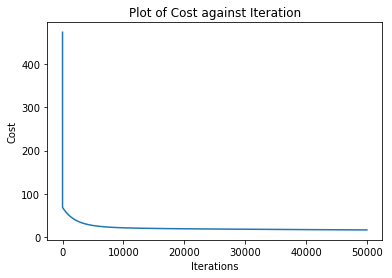

In [113]:
def plot_cost(x, y, title='', ylab='Cost', label = None, legend=None, color = None):
    plt.plot(x, y, color=color, label = label)
    plt.ylabel(ylab)
    plt.xlabel('Iterations')
    plt.title(title)
    if legend != None:
        plt.legend(loc=legend)
    
plot_cost(range(1, len(costs)), costs[1:], title = 'Plot of Cost against Iteration', ylab='Cost')

## Making Predictions

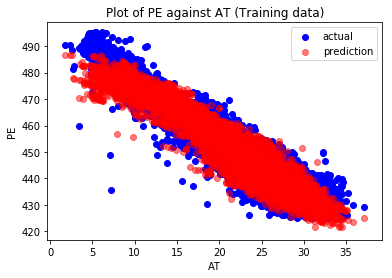

The cost is: 16.2819632271


In [114]:
train_predictions = np.array(train_x).dot(parameters)

plt.scatter(train_x[:,1], train_y, alpha = 1, color='blue', label='actual')
plt.scatter(train_x[:,1], train_predictions, color='red', alpha = 0.5, label='prediction')
plt.title('Plot of PE against AT (Training data)')
plt.legend(loc='upper right')
plt.ylabel('PE')
plt.xlabel('AT')
plt.show()

print 'The cost is:', costs[-1]

In the above, we used the cost as a gauge of how the model fit the data. Using $R^2$ is another measure that can be used to judge how good is the data.

Next, we'll discuss some details of linear regression.

## Choosing the learning rate, $\alpha$

Choosing $\alpha$ can be tricky because:
1. If $\alpha$ is too large, the $\theta_j$ cannot be learnt.
* If $\alpha$ is too small, the algorithm wil run very slowly.

Here are 2 examples.

When the learning rate is too large.


C:\Anaconda2\Lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


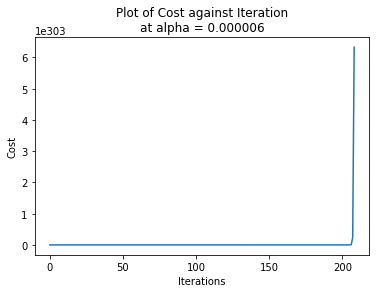

In [115]:
print 'When the learning rate is too large.'
alpha = 6e-6 # 10 times less iteration then before. 6e-7 was the alpha used just now
parameters_, costs_ = linear_regression(train_x, train_y, initial_parameters, alpha, iter = 5000, show = None, early_stopping=False) 
plot_cost(range(len(costs_)), costs_, title = 'Plot of Cost against Iteration\nat alpha = %f' % alpha)

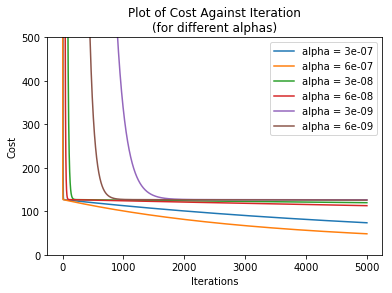

In [116]:
alphas = [3e-7, 6e-7, 3e-8, 6e-8, 3e-9, 6e-9]
iterations = 5000
min_iter = 0

for alpha in alphas:
    initial_parameters = np.zeros(train_x.shape[1])
    parameters, costs = (linear_regression(train_x, train_y, initial_parameters, alpha = alpha
                                                            , iter=iterations, show = None))
    (plot_cost(range(min_iter, iterations), costs[min_iter:]
               , title='Plot of Cost Against Iteration\n(for different alphas)'
               , ylab='Cost', label = 'alpha = %s' %alpha))

plt.axis(ymax=500, ymin= 0)
plt.legend(loc='upper right')
plt.show()

If the learning rate is too small, the cost will take a long time to stabilize. 

## Improving the Model

We can try to improve the prediction power of our model by including more features or transforming the input data. This is termed feature engineering.

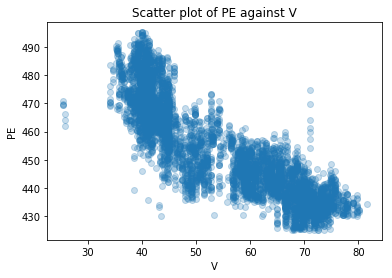

In [117]:
plt.scatter(train_data['V'], train_data[outcome], alpha = 0.25)
plt.title('Scatter plot of PE against V')
plt.ylabel(outcome)
plt.xlabel('V')
plt.show()

What can be observe about how PE changes with V?

Are there possible intereactions between variables?

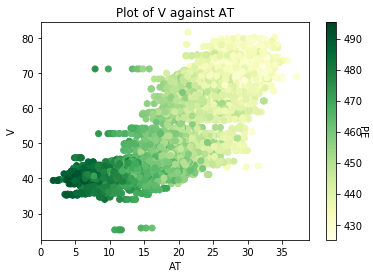

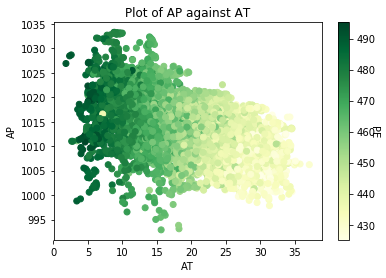

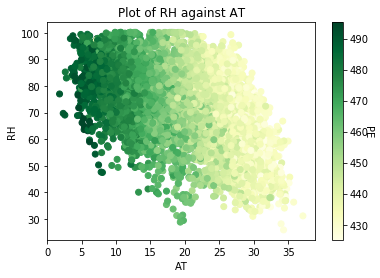

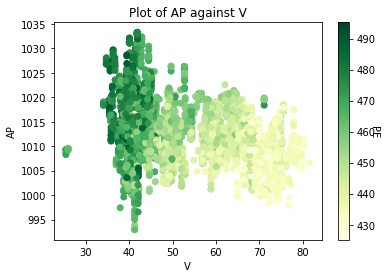

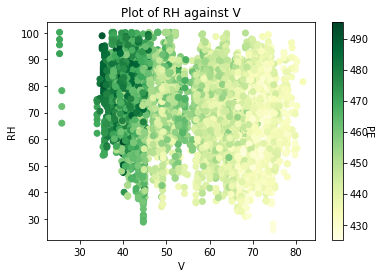

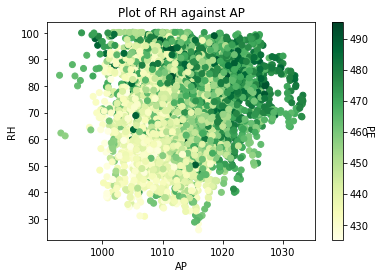

In [118]:
# Visualize how PE changes with changes in 2 variables
for x_feat, y_feat in combinations(features[1:], 2):
    X = train_data[x_feat]; Y= train_data[y_feat]
    plt.scatter(X, Y, c=train_data['PE'], cmap='YlGn')
    plt.xlabel(x_feat)
    plt.ylabel(y_feat)
    cbar = plt.colorbar()
    cbar.set_label('PE', rotation=270)
    plt.title('Plot of %s against %s' %(y_feat, x_feat))
    plt.show()

In [119]:
# Feature Engineering.
train_data['logV'] = np.log(train_data['V'])

# interections between features
train_data['V_AT'] = train_data['V'] * train_data['AT']
train_data['V_AP'] = train_data['V'] * train_data['AP']
train_data['V_RH'] = train_data['V'] * train_data['RH']
train_data['AT_AP'] = train_data['AP'] * train_data['AT']
train_data['AT_RH'] = train_data['RH'] * train_data['AT']
train_data['AP_RH'] = train_data['AP'] * train_data['RH']

### Fitting model with the engineered features

In [120]:
# Engineered Features
eng_features = ['logV', 'V_AT', 'V_AP', 'V_RH', 'AT_AP', 'AT_RH', 'AP_RH']
features_new = features + eng_features

print 'Models that will be built'
for i, feat_i in enumerate(xrange(len(features), 1+len(features_new)), 1):
    print 'model', i, features_new[:feat_i]    

Models that will be built
model 1 ['x_0', u'AT', u'V', u'AP', u'RH']
model 2 ['x_0', u'AT', u'V', u'AP', u'RH', 'logV']
model 3 ['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT']
model 4 ['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP']
model 5 ['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP', 'V_RH']
model 6 ['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP', 'V_RH', 'AT_AP']
model 7 ['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP', 'V_RH', 'AT_AP', 'AT_RH']
model 8 ['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP', 'V_RH', 'AT_AP', 'AT_RH', 'AP_RH']


I can build models with combinations of these features, but I am not going to show it here.

Fitting linear regression model in python using SKLearn library.

In [121]:
# You don't have to implement linear regression from scratch. It has already been built
# fitting different linear regression model
models = []
for i in xrange(len(features), 1+len(features_new)): # this will generate the models we want.
    lr = LinearRegression(normalize=True)
    model_features = features_new[:i]
    models.append(lr.fit(np.array(train_data[model_features]), np.array(train_data[outcome])))

### Making predictions with engineered features

In [135]:
# let's see the MSE error of the models we have built.
train_costs = []
for i, model in enumerate(models, 5):
    predictions = model.predict(np.array(train_data[features_new[:i]]))
    cost = cost_function(np.array(train_data[outcome]), predictions)
    train_costs.append(cost)
    print features_new[:i], cost, model.score(np.array(train_data[features_new[:i]]), np.array(train_data[outcome]))
    print np.mean((model.predict(np.array(train_data[features_new[:i]])) - np.array(train_data[outcome]))**2)/2

['x_0', u'AT', u'V', u'AP', u'RH'] 10.371247906 0.928438938624
10.371247906
['x_0', u'AT', u'V', u'AP', u'RH', 'logV'] 10.0995412156 0.9303137004
10.0995412156
['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT'] 9.12437392985 0.937042303035
9.12437392985
['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP'] 8.94286295945 0.93829471912
8.94286295945
['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP', 'V_RH'] 8.94262135083 0.938296386206
8.94262135083
['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP', 'V_RH', 'AT_AP'] 8.93800920027 0.938328209801
8.93800920027
['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP', 'V_RH', 'AT_AP', 'AT_RH'] 8.90919860214 0.938527001403
8.90919860214
['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP', 'V_RH', 'AT_AP', 'AT_RH', 'AP_RH'] 8.90892428365 0.938528894186
8.90892428365


### Visualizing the costs as more features are added

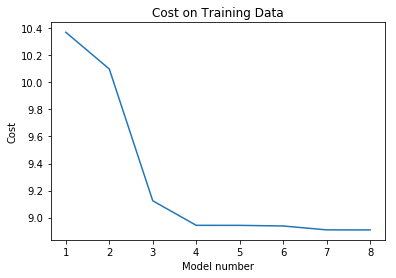

In [136]:
# plot of the cost on training data.
plt.plot(range(1, len(eng_features)+2), train_costs)
plt.ylabel("Cost")
plt.xlabel("Model number")
plt.title("Cost on Training Data")
plt.show()

The model {{np.argmin(train_costs)+1}} has the lowest MSE, and so is the best model.

Hang on! The statement made above is hasty. See the next section on overfitting.

## Overfitting
**IMPORTANT!**

We typically build different models on the same data, each giving different predictions on the same $x$. We can compare their performance using the cost_function.

However, to gain an estimate on the real world performance of the model developed, we cannot compare the cost on the same data we used to train the model, i.e. the training data. This is because our model is optimized on those data. Using the training data, we can build a complex model that can predict all the y values perfectly, and get very low error, but when deploying the model, the performance will not be as ideal. This is called **overfitting**. 

We have fitted {{len(train_costs)}} models. Should we deploy model {{np.argmin(train_costs)+1}} because it has the lowest cost?

**No!** The models built shoud be tested on the validation data created earlier. The choosen model is the model that gives the lowest cost on the validation data.

In [137]:
# Feature Engineering.
val_data['logV'] = np.log(val_data['V'])

# interactions between features
val_data['V_AT'] = val_data['V'] * val_data['AT']
val_data['V_AP'] = val_data['V'] * val_data['AP']
val_data['V_RH'] = val_data['V'] * val_data['RH']
val_data['AT_AP'] = val_data['AP'] * val_data['AT']
val_data['AT_RH'] = val_data['RH'] * val_data['AT']
val_data['AP_RH'] = val_data['AP'] * val_data['RH']

In [138]:
# testing each model built on the validation data.
val_costs = []
actual = np.array(val_data[outcome])
for i, model in enumerate(models, 5):
    predictions = model.predict(np.array(val_data[features_new[:i]]))
    cost = cost_function(np.array(val_data[outcome]), predictions)
    val_costs.append(cost)
    print 'Model', i-4, features_new[:i], cost

Model 1 ['x_0', u'AT', u'V', u'AP', u'RH'] 10.3196796592
Model 2 ['x_0', u'AT', u'V', u'AP', u'RH', 'logV'] 10.4202668099
Model 3 ['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT'] 9.54756427516
Model 4 ['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP'] 9.4506954383
Model 5 ['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP', 'V_RH'] 9.446859621
Model 6 ['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP', 'V_RH', 'AT_AP'] 9.43242538276
Model 7 ['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP', 'V_RH', 'AT_AP', 'AT_RH'] 9.42394955397
Model 8 ['x_0', u'AT', u'V', u'AP', u'RH', 'logV', 'V_AT', 'V_AP', 'V_RH', 'AT_AP', 'AT_RH', 'AP_RH'] 9.42213524787


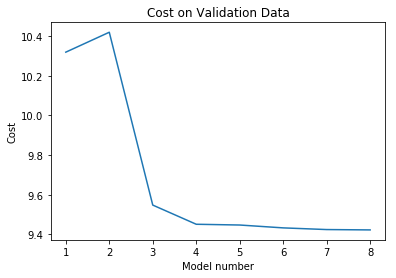

In [139]:
plt.plot(range(1, len(val_costs)+1), val_costs)
plt.ylabel("Cost")
plt.xlabel("Model number")
plt.title("Cost on Validation Data")
plt.show()

The model that performed best on the validation data is model {{np.argmin(val_costs)+1}}. 

The best model choosen on the validation set and the training set may be different. However, the model choosen by the validation set is the one to choose as that model was not built with those data, hence has less danger of overfitting.

# Logistic Regression

Logistic Regression is a binary class classification algorithm. 

If I have data belong to objects that can be classified into 1 of 2 classes, what is the best hyperplane that is capable of separating these 2 classes?

Dataset is the Prostate Cancer Study (PCS.DATA) [dataset](https://www.umass.edu/statdata/statdata/stat-logistic.html), from Hosmer and Lemeshow (2000) Applied Logistic Regression: Second Edition, copyrighted by John Wiley & Sons Inc.

Here is a description of the data:
<img src='data/CHDAGE.PNG' height='600' width='600'\>

In [ ]:
# Loading the python libraries
from sklearn.linear_model import LogisticRegression

In [ ]:
# reading the data from file
data = pd.read_excel('data/chdage.xls')
data = data.dropna()
data.head()

In [ ]:
data.describe()

In [ ]:
positive = data[data.CHD==1]
negative = data[data.CHD==0]

plt.plot([40, 40], [-0.5, 1.5], '--', color='gray')
plt.scatter(positive.AGE, positive.CHD, label='positive', color='r', alpha=0.5)
plt.scatter(negative.AGE, negative.CHD, label='negative', color = 'g', alpha=0.5)
plt.legend(loc='lower right')
plt.yticks([0, 1], ['0','1']); plt.ylim(ymin=-0.5, ymax=1.5)
plt.xlabel('AGE'); plt.ylabel('CHD'); plt.title('Graph of Presence of Heart Disease Against Age')
plt.show()

## How would a linear regression line fit the graph?

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data.AGE, data.CHD)

plt.plot(np.arange(10, 91, 10), np.arange(10, 91, 10)*slope + intercept)
plt.scatter(positive.AGE, positive.CHD, label='positive', color='r', alpha=0.5)
plt.scatter(negative.AGE, negative.CHD, label='negative', color = 'g', alpha=0.5)
plt.legend(loc='lower right')
plt.yticks([0, 1], ['0','1'])
plt.ylim(ymin=-0.5, ymax=1.5); plt.xlim(xmin=10, xmax=90)
plt.xlabel('AGE'); plt.ylabel('CHD'); plt.title('Graph of Presence of Heart Disease Against Age')
plt.show()

## The sigmoid function

The result will exceed the '0' and '1' target value. To get around this issue, logistic regression is modelled as:

$$\log\frac{P(Y=1\mid x)}{1-P(Y=1\mid x)} = z$$

$$z=\theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

$$P(Y=1\mid x)=\frac{1}{1+e^{-z}}$$

$$Y = \begin{cases}
 1,  & \text{if $P(Y=1\mid x) \geq$ 0.5} \\
 0, & \text{if $P(Y=1\mid x) \lt$ 0.5}
\end{cases}$$

where $P(Y=1\mid x)$ is the probability of predicting $Y=1$ given the values of $x$.

Where $$\sigma(z) = \frac{1}{1+e^{-z}}$$ is the sigmoid function

The resulting plot is:

In [ ]:
lr = LogisticRegression()
y = np.array(data.CHD.apply(str))
lr.fit(data[['AGE']], data[['CHD']])
slope, intercept = lr.coef_, lr.intercept_

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.plot(np.arange(10, 91, 2), sigmoid(slope[0][0]*np.arange(10, 91, 2) + intercept))
plt.scatter(positive.AGE, positive.CHD, label='positive', color='r', alpha=0.5)
plt.scatter(negative.AGE, negative.CHD, label='negative', color = 'g', alpha=0.5)
plt.legend(loc='lower right')
plt.yticks([0, 1], ['0','1']); plt.ylim(ymin=-0.5, ymax=1.5); plt.ylabel('CHD')
plt.xlim(xmin=10, xmax=90); plt.xlabel('AGE')
plt.title('Graph of Presence of Heart Disease Against Age')
plt.show()

## Cost function of Logistic Regression
\begin{align}
Cost & = \begin{cases}
- \log \sigma(z),  & \text{if y is 1} \\
- \log (1-\sigma(z)), & \text{if y is 0} \\
\end{cases} \\
& = -(1-y)(\log (1-\sigma(z))) - y(\log \sigma(z))
\end{align}

$$J = \frac{1}{m}\sum_{i=1}^n Cost$$

## Tips: Handling Data Type in Regression and Machine Learning

So far, we have only seen features which are numerical. **How do we handle categorical features?**

Ans: We can use one hot encoding (ohe), or we can count (as we will see in text analytics).

In [ ]:
data = pd.read_csv('data/cars.csv', header=None)
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']

data.describe()

In [ ]:
# Perform ohe
data_ohe = pd.get_dummies(data)

data_ohe.iloc[np.random.randint(data_ohe.shape[0], size=10)]

In [ ]:
print 'The number of columns has increased from %i to %i' %(data.shape[1], data_ohe.shape[1])

# Clustering

<br>
<a>What is clustering?</a>
<img src='img\clustering.png'/>

<a>Is clustering easy?</a>

<img src='img\uncertainty-in-number-of-clusters.png'/>

2 of the clustering algorithms commonly taught in an introductory class are:
1. Hierarchical clustering
* KMeans clustering

You can think of hierarchical clustering is a bottom-up approach starting from each data point to find the clusters, while KMeans is a top-down approach starting with the number of clusters already defined.

## Clustering Demo

The famous Fisher's Iris dataset

In [ ]:
# Importing python libraries
from pandas.tools.plotting import parallel_coordinates
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [ ]:
# load the dataset from sklearn library
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.describe()

In [ ]:
iris.target_names

**Tips**

Before clustering, the advice is to normalize the data to mean = 0 and standard deviation = 1. If the data is not normalized, the variable which large magnitude of variance will dominate the distance calculation. The dimensions of the petal have the same magnitude, so normalizing is not necessary. However, let's normalize the data anyway for sake of completeness.

In [ ]:
# Normalizing the data.
iris_norm = iris_df.apply(lambda x: (x - np.mean(x))/np.std(x))
iris_norm.head()

### Hierarchical Clustering

1. Start by calculating pairwise distances of each cluster. Think of each data point as a cluster. So if there are n number of data points, there are n clusters at the start of the algorithm.
* Group the 2 nearest "clusters" into a single cluster.
* Calculate the center of this cluster. 
* Calculate the distance between this cluster and the other clusters.
* Repeat from step 2 till all the data are in a single cluster.

In [ ]:
Z = linkage(iris_norm, 'average')
labels = map(lambda x: iris.target_names[x], iris.target)

# calculate full dendrogram
def draw_dendrogram(Z, title='Hierarchical Clustering Dendrogram', xlab='sample index', ylab='distance', leaf_rotation=0., font_size=8.):
    plt.figure(figsize=(15, 15))
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    dendrogram(
        Z,
        labels=labels,
        orientation='right',
        leaf_rotation=leaf_rotation,  # rotates the x axis labels
        leaf_font_size=font_size,  # font size for the x axis labels
    )
    plt.show()
    
draw_dendrogram(Z, title = 'Cluster center', ylab = 'Average distance', xlab='species')    

### KMeans Clustering

Kmeans starts by defining the number of clusters in the dataset. One way to gauge the number of clusters is by the above visual method.

Here are the steps for KMeans:
1. Randomly assign K data points as the center of each cluster. K is the number of clusters you desired.
* Calculate the distance of each data point to each of the K centers.
* Assign each data point to the nearest cluster.
* Recalculate the centre of the clusters by taking the average values of all data point belonging to that cluster.
* Repeat from step 1 until the maximum number of iterations is reached, or when the cluster has stabilized.

In [ ]:
num_iter = 6
n_clusters = 3
initial_center = np.random.randint(iris_norm.shape[0], size=3)
centres = iris_norm.iloc[initial_center]
cluster_color = {0:'k', 1:'orange', 2:'b'}
x = iris.feature_names[1]
y = iris.feature_names[3]
centre_hist = []

subplot_y_num = int(math.sqrt(num_iter))
subplot_x_num = int(math.ceil(math.sqrt(num_iter)))
f, axarr = plt.subplots(subplot_y_num, subplot_x_num, figsize=(16,16))
subplot_index = list(product(xrange(subplot_y_num), xrange(subplot_x_num)))
for i in xrange(num_iter):
    centre_hist.append(centres)
    distances = pairwise_distances(iris_norm.iloc[:, :4], centres.iloc[:, :4])
    iris_norm['cluster'] = np.argmin(distances, axis=1)
    
    for item in subplot_index:
        axarr[subplot_index[i][0], subplot_index[i][1]].scatter(iris_norm[x], iris_norm[y], 
                                                                color=iris_norm.cluster.apply(lambda x: cluster_color[x]), 
                                                                alpha = 0.5)
        axarr[subplot_index[i][0], subplot_index[i][1]].scatter(centres[x], centres[y], marker='+', color='red', s=200)
        axarr[subplot_index[i][0], subplot_index[i][1]].set_title('Iteration %i' %(i), size=20)
        axarr[subplot_index[i][0], subplot_index[i][1]].set_xlabel(x, size=15)
        axarr[subplot_index[i][0], subplot_index[i][1]].set_ylabel(y, size=15)
        # Fine-tune figure; hide x ticks for top plots and y ticks for right plots
        plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
        plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
    centres = iris_norm.groupby('cluster').aggregate(np.average)
    
f.tight_layout()
plt.show()    

How did the clustering perform?

In [ ]:
result = pd.DataFrame(iris.target, columns=['species']).join(iris_norm.cluster)
result = result.join(pd.get_dummies(result.cluster))
print result.ix[:, result.columns!='cluster'].groupby('species').sum()

### Number of clusters

Inertia metric = Sum of distance from respective cluster centers.

In [ ]:
inertias = []
Ks = xrange(2, 20)
for k in Ks:
    kmeans = KMeans(max_iter=10, n_clusters=k)
    kmeans.fit(iris_norm.iloc[:, :4])
    inertias.append(kmeans.inertia_)
    
plt.plot(Ks, inertias, marker='o')
plt.title("Plot of inertia v.s. number of clusters, K")
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')
plt.ylim(ymin=0)
plt.show()

Cons - Hard to decide where is the 'elbow', and hence how many clusters there are.

### Characteristics of Clusters

A cluster is characterized by the cluster center.

In [ ]:
# For each cluster, see the average of each dimension.
# Need to see the original, unnormalized dimensions of the data.
iris_df['cluster'] = iris_norm.cluster
agg_colname_dict = {}
for name in iris.feature_names:
    agg_colname_dict[name] = {'Mean values':np.mean}

iris_df.groupby('cluster').aggregate(agg_colname_dict)

In [ ]:
# Using Parallel plot
parallel_coordinates(iris_df, 'cluster')
plt.title('Parallel Coordinates Plot of the Clusters')
plt.show()

# Further Exploration

* Class Imbalance
* Regularization
    * L1 regularization, aka, Lasso
    * L2 regularization, aka, Ridge Regression
* Support Vector Machine aka SVM
* Decision Tree Classification
* KMeans++
* Expectation Maximization

# Q&A

# Thank You for Your Attention. Stay Tune for Track 2: Text Analytics